In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
x, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

In [4]:
# Taking care of missing data
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values = 0, axis = 0, strategy = "mean")
imp = imp.fit(x.loc[:, "R&D Spend": "Marketing Spend"])
x.loc[:, "R&D Spend": "Marketing Spend"] = imp.transform(x.loc[:, "R&D Spend": "Marketing Spend"])

x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(categorical_features = [3])

x.State = le.fit_transform(x.State)
x = ohe.fit_transform(x).toarray()

In [6]:
# Avoiding the Dummy Variable Trap
x = x[:, 1:]

## Building the optimal model using Backward Elimination

In [7]:
import statsmodels.formula.api as sm

ones = np.ones(shape = (len(x), 1), dtype = int)
x = np.append(ones, x, axis = 1)

In [8]:
from copy import deepcopy
optimalx = deepcopy(x)

OLS_regressor = sm.OLS(endog = y, exog = optimalx).fit()
OLS_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     35.69
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           2.02e-14
Time:                        02:42:48   Log-Likelihood:                -560.14
No. Observations:                  50   AIC:                             1132.
Df Residuals:                      44   BIC:                             1144.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.813e+04   1.43e+04      2.665      0.011    9288.988     6.7e+04
x1          6619.5300   6757.696      0.980      0.333   -6999.712    2.02e+04
x2          5793.7942   6594.305      0.879      0.384   -7496.154    1.91e+04
x3             0.7076      0.093      7.591      0.000       0.520       0.895
x4             0.0103      0.107      0.096      0.924      -0.206       0.226
x5             0.0633      0.036      1.750      0.087      -0.010       0.136
==============================================================================
Omnibus:                       54.528   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.512
Skew:                          -2.917   Prob(JB):                     3.33e-61
Kurtosis:                      12.983   Cond. No.                     1.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# optimalx = optimalx[:, [0, 1, 2, 3, 5]]
optimalx = np.delete(arr = optimalx, obj = [4], axis = 1)

OLS_regressor = sm.OLS(endog = y, exog = optimalx).fit()
OLS_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     45.61
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           2.80e-15
Time:                        02:42:48   Log-Likelihood:                -560.15
No. Observations:                  50   AIC:                             1130.
Df Residuals:                      45   BIC:                             1140.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.933e+04   6877.914      5.719      0.000    2.55e+04    5.32e+04
x1          6666.9737   6665.186      1.000      0.323   -6757.399    2.01e+04
x2          5837.0964   6506.197      0.897      0.374   -7267.056    1.89e+04
x3             0.7115      0.083      8.551      0.000       0.544       0.879
x4             0.0620      0.033      1.856      0.070      -0.005       0.129
==============================================================================
Omnibus:                       54.721   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.572
Skew:                          -2.926   Prob(JB):                     7.20e-62
Kurtosis:                      13.045   Cond. No.                     8.94e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# optimalx = optimalx[:, [0, 1, 3, 4]]
optimalx = np.delete(arr = optimalx, obj = [2], axis = 1)

OLS_regressor = sm.OLS(endog = y, exog = optimalx).fit()
OLS_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     60.81
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           4.86e-16
Time:                        02:42:48   Log-Likelihood:                -560.59
No. Observations:                  50   AIC:                             1129.
Df Residuals:                      46   BIC:                             1137.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.172e+04   6330.504      6.590      0.000     2.9e+04    5.45e+04
x1          3623.4197   5725.075      0.633      0.530   -7900.558    1.51e+04
x2             0.7046      0.083      8.522      0.000       0.538       0.871
x3             0.0669      0.033      2.034      0.048       0.001       0.133
==============================================================================
Omnibus:                       58.427   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.892
Skew:                          -3.123   Prob(JB):                     5.74e-75
Kurtosis:                      14.185   Cond. No.                     6.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# optimalx = optimalx[:, [0, 2, 3]]
optimalx = np.delete(arr = optimalx, obj = [1], axis = 1)

OLS_regressor = sm.OLS(endog = y, exog = optimalx).fit()
OLS_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     92.19
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           5.41e-17
Time:                        02:42:48   Log-Likelihood:                -560.81
No. Observations:                  50   AIC:                             1128.
Df Residuals:                      47   BIC:                             1133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.242e+04   6193.750      6.848      0.000       3e+04    5.49e+04
x1             0.7023      0.082      8.557      0.000       0.537       0.867
x2             0.0698      0.032      2.155      0.036       0.005       0.135
==============================================================================
Omnibus:                       59.576   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.705
Skew:                          -3.188   Prob(JB):                     2.86e-79
Kurtosis:                      14.531   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# optimalx = optimalx[:, [0, 2]]
optimalx = np.delete(arr = optimalx, obj = [2], axis = 1)

OLS_regressor = sm.OLS(endog = y, exog = optimalx).fit()
OLS_regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     167.0
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           3.03e-17
Time:                        02:42:48   Log-Likelihood:                -563.16
No. Observations:                  50   AIC:                             1130.
Df Residuals:                      48   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   5581.515      8.784      0.000    3.78e+04    6.03e+04
x1             0.8202      0.063     12.924      0.000       0.693       0.948
==============================================================================
Omnibus:                       68.405   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.781
Skew:                          -3.665   Prob(JB):                    7.67e-127
Kurtosis:                      18.002   Cond. No.                     1.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(optimalx, y, test_size = 0.2, random_state = 0)

In [14]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Predicting the Test set results
ypredicted = regressor.predict(xtest)

# model accuracy
print("Accuracy = {0:0.2f}%".format(regressor.score(xtest, ytest) * 100))

Accuracy = 91.20%


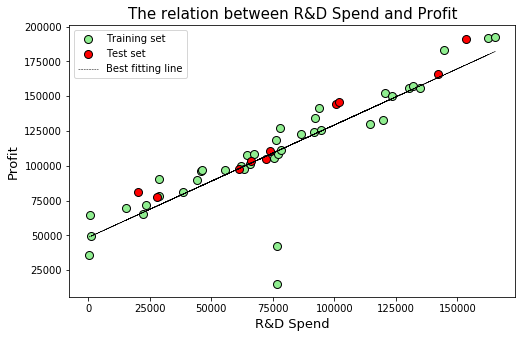

In [16]:
plt.figure(figsize = (8, 5))

plt.xlabel("R&D Spend", fontsize = 13)
plt.ylabel("Profit", fontsize = 13)
plt.title("The relation between R&D Spend and Profit", fontsize = 15)

plt.plot(
    xtrain[:, 1], ytrain,
    label = "Training set",
    marker = 'o',
    markersize = 8,
    markeredgecolor = "black",
    color = "lightgreen",
    linestyle = ''
)

plt.plot(
    xtest[:, 1], ytest, 
    label = "Test set",
    marker = 'o',
    markersize = 8, 
    markeredgecolor = "black", 
    color = "red", 
    linestyle = ''
)

plt.plot(
    xtrain[:, 1], regressor.predict(xtrain),
    label = "Best fitting line", 
    color = "black",
    linestyle = '--', 
    linewidth = 0.5
)

plt.legend()

In [17]:
m = regressor.coef_[1]
b = regressor.intercept_

print("slope =", m)
print("y-intercept =", b)

slope = 0.8085654000539728
y-intercept = 48397.3132481523
